Notebook used for debugging and improving FrequecnyFits.

NOTE: To work with EOB or NR data, you need to get the data we are working with from `home/md.shaikh/ecc_waveforms` on CIT.


In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import glob

import sys
sys.path.append("../")

import gw_eccentricity
from gw_eccentricity import get_available_methods
from gw_eccentricity import measure_eccentricity
from gw_eccentricity.load_data import load_waveform

gw_eccentricity.plot_settings.use_fancy_plotsettings()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### debug issue #50

In [14]:
waveform_keywords = {"filepath": "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q1.00_chi1z0.00_chi2z0.00_EOBecc0.4278619249_Momega00.010.h5"}
dataDict = load_waveform(catalog="EOB", **waveform_keywords)
tref_vec = dataDict["t"]
tref_out, ecc_vec, mean_ano_vec, eccMethod = measure_eccentricity(tref_in=tref_vec, dataDict=dataDict, method="FrequencyFits", 
                                                                      return_gwecc_object=True,
                                                                      extra_kwargs={"debug": False})
print(ecc_vec)

[0.32501383 0.32501224 0.32501066 ... 0.032158   0.03214611 0.03213424]


### Debug issue #49

In [15]:
waveform_keywords = {"filepath": "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q1.00_chi1z0.00_chi2z0.00_EOBecc0.1052704229_Momega00.010.h5"}
dataDict = load_waveform(catalog="EOB", **waveform_keywords)
tref_vec = dataDict["t"]
tref_out, ecc_vec, mean_ano_vec, eccMethod = measure_eccentricity(tref_in=tref_vec, dataDict=dataDict, method="FrequencyFits", 
                                                                      return_gwecc_object=True,
                                                                      extra_kwargs={"debug": False})
print(ecc_vec)

[0.07428705 0.07428544 0.07428383 ... 0.01584029 0.01583056 0.01582078]


/Users/pfeiffer/research/Projects/Eccentricity/notebook/../gw_eccentricity/eccDefinition.py:555: UserWarning: Number of pericenters and number of apocenters differ by 2. This implies that pericenters and apocenters are not appearing alternately.
  warnings.warn(


### Debug Issue 49 (part b)

t_analyse[0]=-34467.96956839502, t_analyse[-1]=-53.96956839501945
global fit: guess p0=[0.09917903057134636, 2.154695674358525e-06, 0.0], bounds=[[0.0, 0.0, -43.175654716015565], [1.0, 0.0005793417316666895, 17260.96956839502]]
=== count=1 ============================================================
FindExtremaNearIdxRef  idx_ref=2243, K_initial=1.200, p_initial=0.77(+20.34-t)^-0.348
it=1:  [0 / 2243 / 4430]
width for find_peaks = 149
idx_extrema=[ 723 1444 2160 2871 3577 4277], Nleft=3, Nright=3, K=1.159
idx_ref increased to 3224
idx_hi increased to 4847
it=2:  [0 / 3224 / 4847]
width for find_peaks = 148
idx_extrema=[ 723 1444 2160 2871 3577 4277], Nleft=4, Nright=2, K=1.159
Count_Nright_short=1
idx_hi increased to 5261
it=3:  [0 / 3224 / 5261]
width for find_peaks = 148
idx_extrema=[ 723 1444 2160 2871 3577 4277 4973], Nleft=4, Nright=3, K=1.160
max_delta_omega=0.02115 => fit updated to f_fit=0.972(+607.96-t)^-0.371
it=4:  [0 / 3224 / 5261]
width for find_peaks = 148
idx_extrema=[ 7

Exception: FindExtremaNearIdxRef seems to not converge (use 'verbose=True' to diagnose)

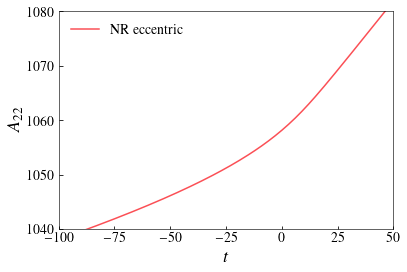

In [36]:
kwargs = {"filepath": "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q6.00_chi1z0.40_chi2z-0.40_EOBecc0.0018322339_Momega00.010_meanAno0.000.h5"}
dataDict = load_waveform("EOB", **kwargs)
# Plot the two waveforms
plt.plot(dataDict["t"], -np.unwrap(np.angle(dataDict["hlm"][(2, 2)])), label="NR eccentric")
plt.legend()
plt.xlabel(r"$t$")
plt.ylabel(r"$A_{22}$");
plt.xlim([-100,50])
plt.ylim([1040,1080])

if True:
    tref_in = dataDict["t"]
    method = "FrequencyFits"
    tref, ecc, meanAno, eccMethod = \
        measure_eccentricity(tref_in=tref_in,
                         dataDict=dataDict,
                         method=method,
                         return_gwecc_object=True,
                         extra_kwargs={# 'extrema_finding_kwargs': {"width": 25},
                         # "treat_mid_points_between_peaks_as_troughs": False,
                         "debug": True})
    print(ecc_vec)

### Debug issue #49 (part c)

In [ ]:
kwargs = {"filepath": "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q6.00_chi1z0.40_chi2z-0.40_EOBecc0.0003719374_Momega00.010_meanAno1.571.h5"}
dataDict = load_waveform("EOB", **kwargs)
tref_in = dataDict["t"]
method = "FrequencyFits"
tref, ecc, meanAno, eccMethod = measure_eccentricity(tref_in=tref_in,
                                                         dataDict=dataDict,
                                                         method=method,
                                                         return_ecc_method=True,
                                                         extra_kwargs={# 'extrema_finding_kwargs': {"width": 25},
                                                         "treat_mid_points_between_peaks_as_troughs": False,
                                                         "debug": False})

Debug issue #66

In [ ]:
waveform_keywords = {"filepath": '../data/ecc_waveforms/Non-Precessing/SXS/BBH_SHK_q6_e095_D65_Res3.h5',
                    "include_zero_ecc": False}
#dataDict = load_waveform(catalog="LVCNR", **waveform_keywords)
method = "FrequencyFits"
tref_vec = dataDict["t"]
tref_out, ecc_vec, mean_ano_vec, eccMethod = measure_eccentricity(tref_in=tref_vec, dataDict=dataDict, method=method, 
                                                                return_ecc_method=True,
                                                                extra_kwargs={"debug": True})
#fig, ax = eccMethod.make_diagnostic_plots()

### Debug issue #69

In [ ]:
kwargs = {"filepath": "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.0106376485_Momega00.010_meanAno1.571.h5"}
dataDict = load_waveform("EOB", **kwargs)
tref_in = dataDict["t"]
tref, measured_ecc, mean_ano, eccMethod = measure_eccentricity(tref_in=tref_in,
                                                              method="FrequencyFits",
                                                              dataDict=dataDict,
                                                              return_ecc_method=True,
                                                              extra_kwargs={"debug": True})
